In [738]:
!pip install matplotlib


C:\Users\47939\anaconda3\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedWriter name=8>
  del self._target, self._args, self._kwargs
C:\Users\47939\anaconda3\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  del self._target, self._args, self._kwargs
C:\Users\47939\anaconda3\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=10>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x213ea10ae80>


[Kaggle Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)


# Link above for Dataset in this analysis with the file name: heart_csv

In [739]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [740]:
# Reading the files
df_heart=pd.read_csv('heart.csv')

In [741]:
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


# Exploratory data analysis

In [742]:
df_heart.shape
print("Dataset Shape : ",df_heart.shape)

Dataset Shape :  (1025, 14)


In [743]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [744]:
df_heart.isnull().sum()# Checking for mull values:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [745]:
df_heart.index
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [746]:
data_dup = df_heart.duplicated().any()
data_dup_count = df_heart.duplicated().sum()
print("Number of duplicated values:", data_dup_count)

Number of duplicated values: 723


In [747]:
df_heart = df_heart.drop_duplicates()

In [748]:
data_dup = df_heart.duplicated().any()
data_dup

False

In [749]:
df_heart.shape

(302, 14)

In [750]:
df_heart.describe(include ='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Statistical Inference

In [751]:
isnull_number = []
for i in df_heart.columns:
    x = df_heart[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,index = df_heart.columns , columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [752]:
# Differentiate b/w Numerical and Categorical Values
unique_numbers = []
for i in df_heart.columns:
    x=df_heart[i].value_counts().count()
    unique_numbers.append(x)
pd.DataFrame(unique_numbers,index = df_heart.columns,columns = ["Total Unique Numbers"])

,Total Unique Numbers
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


# Categorical Variables:

sex (Assuming 0 for female and 1 for male)

cp (chest pain type)

fbs (fasting blood sugar)

restecg (resting electrocardiographic results)

exang (exercise-induced angina)

slope (slope of the peak exercise ST segment)

ca (number of major vessels colored by fluoroscopy)

thal (thalassemia)

target (assuming binary classification)

## Continuous Variables:

age

trestbps (resting blood pressure)

chol (serum cholesterol)

thalach (maximum heart rate achieved)

oldpeak (ST depression induced by exercise relative to rest)

In [753]:
# Divide numerical and catergorical data :
numerical_var = ["age","trestbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]


In [754]:
df_heart[numerical_var].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


<AxesSubplot:xlabel='age', ylabel='Density'>

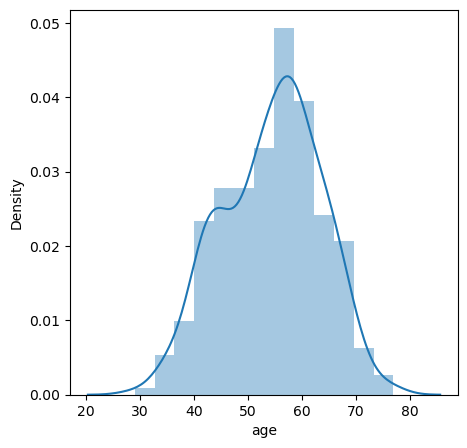

In [755]:
sns.distplot(df_heart["age"])# normal distribution

<AxesSubplot:xlabel='chol', ylabel='Density'>

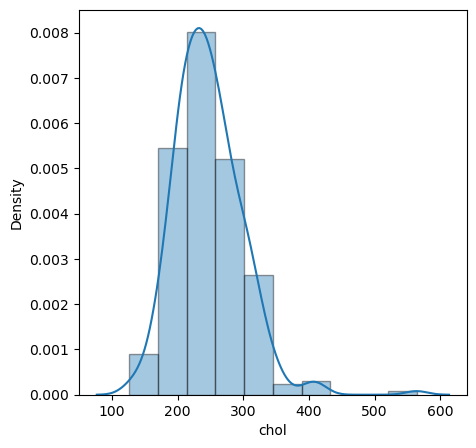

In [756]:
sns.distplot(df_heart["chol"],hist_kws = dict(linewidth = 1 , edgecolor = "k"),bins=10)

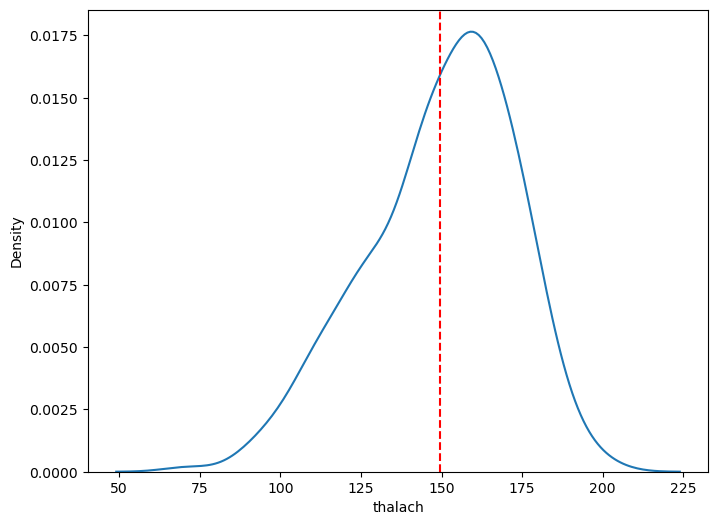

In [757]:
x , y = plt.subplots(figsize = (8,6))
sns.distplot(df_heart["thalach"], hist = False , ax = y)
y.axvline(df_heart["thalach"].mean(),color = "r", ls = "--")

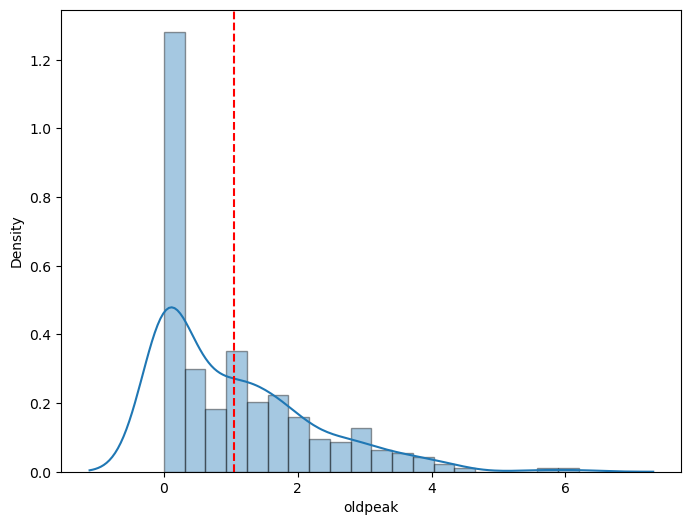

In [758]:
x , y = plt.subplots(figsize=(8,6))
sns.distplot(df_heart["oldpeak"],hist_kws=dict(linewidth = 1,edgecolor="k"), bins = 20 , ax = y)
y.axvline(df_heart["oldpeak"].mean(),color="r",ls="--")

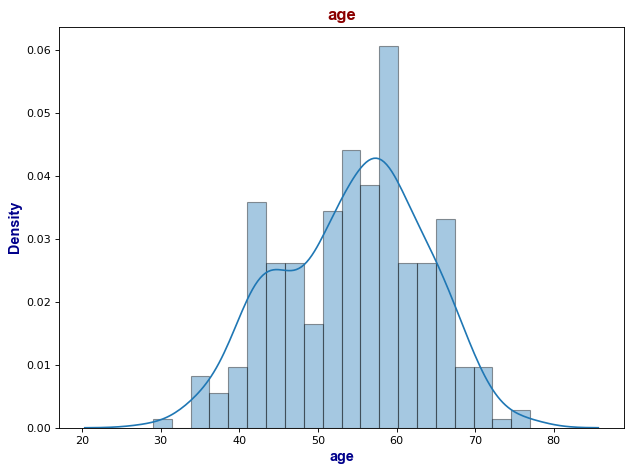

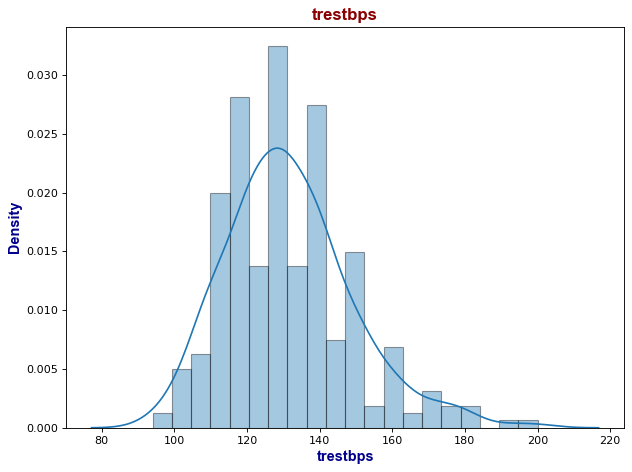

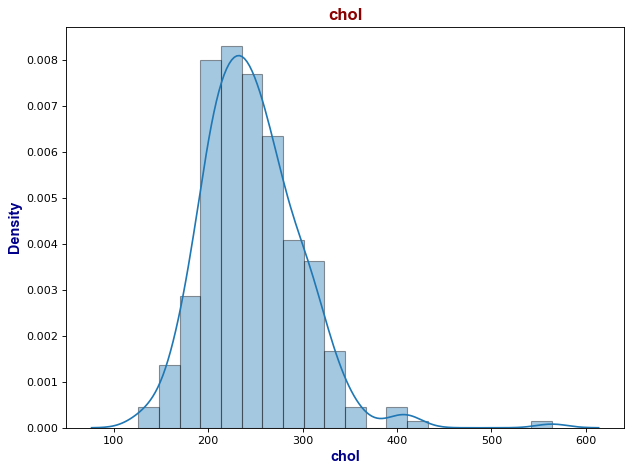

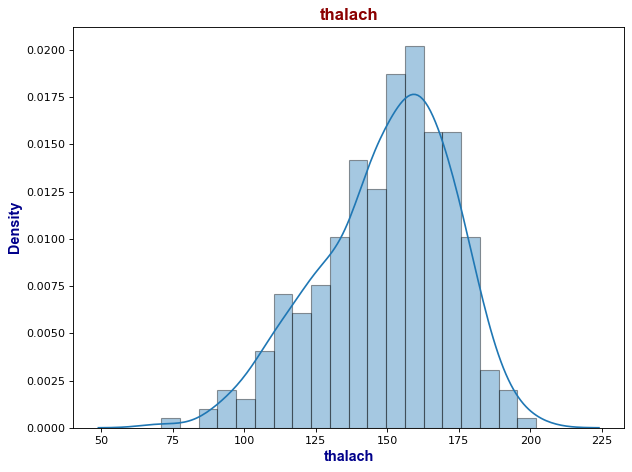

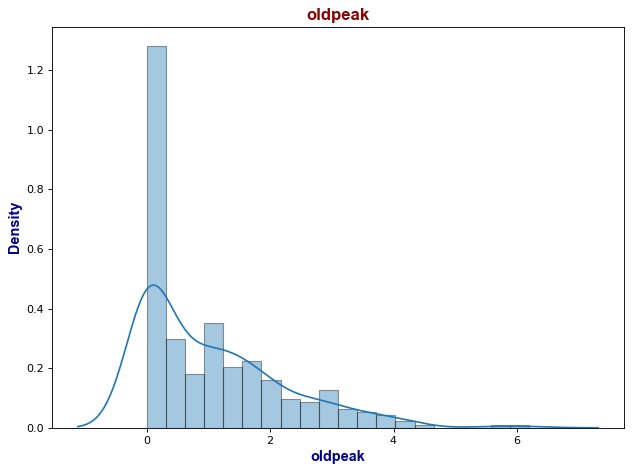

In [759]:
## Draw all the grapgh for numerical variables.
title_font = {"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font = {'family':'arial' , 'color' : 'darkblue' , 'weight' : 'bold' , 'size' : 13}
for i in numerical_var:
    plt.figure(figsize=(8,6),dpi=80)
    sns.distplot(df_heart[i],hist_kws=dict(linewidth=1 , edgecolor="k"), bins = 20)
    
    plt.title(i , fontdict = title_font)
    plt.xlabel(i , fontdict = axis_font)
    plt.ylabel("Density", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

In [760]:
# some of the data is not normal distributed,soem is left skewed or right skewed ( old peak or thalach).Why?

In [761]:

numerical_axis_name = ["Age", "Blood Pressure", "Cholesterol", "Heart rate max", "ST Depression"]

In [762]:
list(zip(numerical_var,numerical_axis_name))

[('age', 'Age'),
 ('trestbps', 'Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Heart rate max'),
 ('oldpeak', 'ST Depression')]

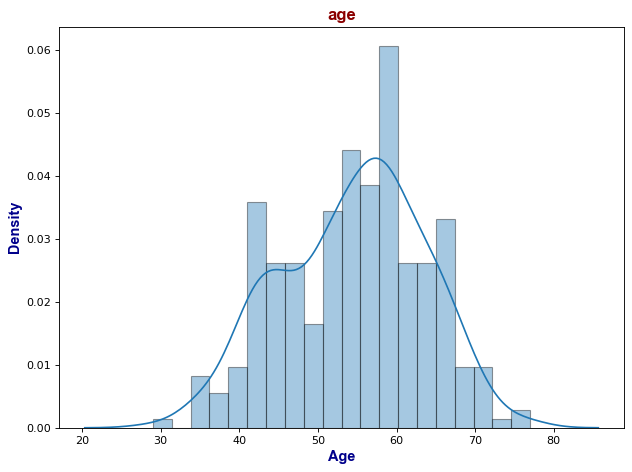

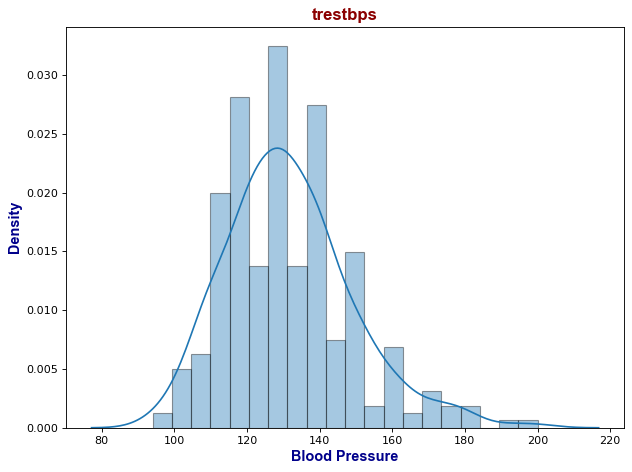

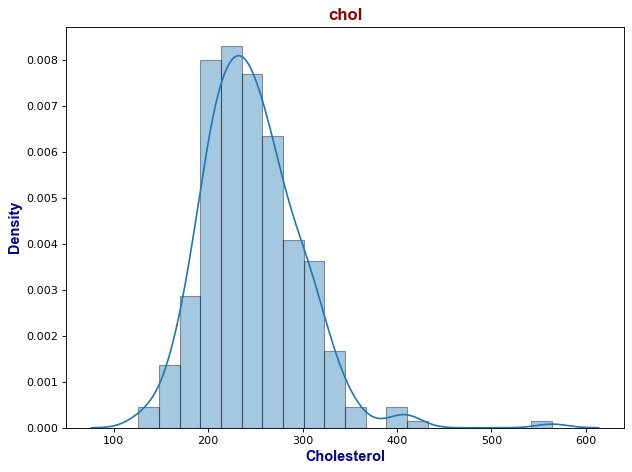

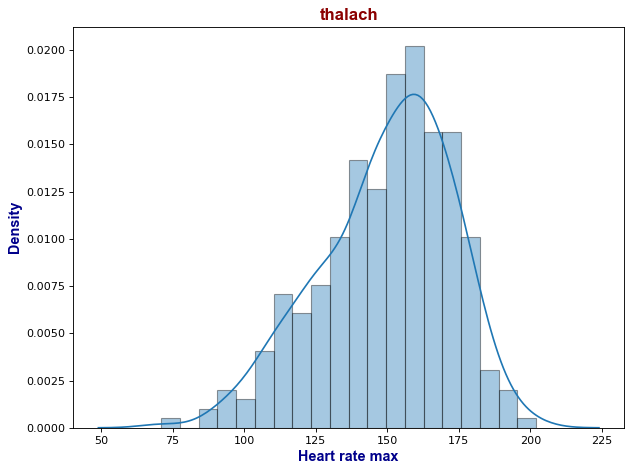

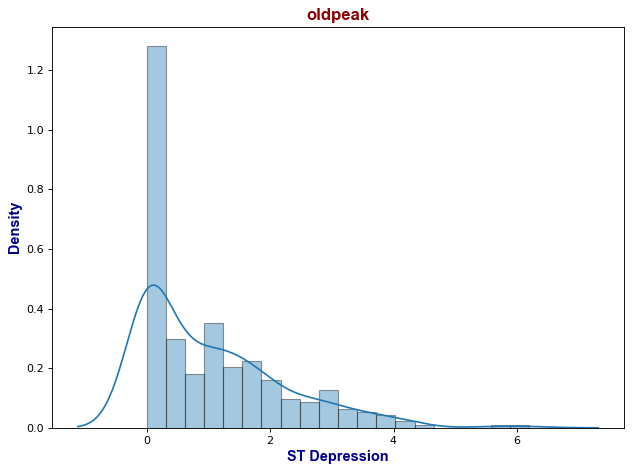

In [763]:
title_font = {'family':'arial','color':'darkred','weight':'bold','size':15}
axis_font = {'family':'arial','color':'darkblue','weight':'bold','size':13}
for i,z in list(zip(numerical_var,numerical_axis_name)):
    plt.figure(figsize = (8,6) , dpi = 80)
    sns.distplot(df_heart[i], hist_kws = dict(linewidth=1,edgecolor="k"), bins = 20)
    
    plt.title(i , fontdict= title_font)
    plt.xlabel(z , fontdict= axis_font)
    plt.ylabel("Density" , fontdict= axis_font)
    
    plt.tight_layout()
    plt.show()

In [764]:
categorical_var = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target" ]
categorical_axis_name = ["Sex","Chest pain type","Blood Sugar","Electrocardiographic","exercise induced angina","Peak exercise ST"," Number of vessels","Thalassemia","Target"]

In [765]:
list(zip(categorical_var,categorical_axis_name))

[('sex', 'Sex'),
 ('cp', 'Chest pain type'),
 ('fbs', 'Blood Sugar'),
 ('restecg', 'Electrocardiographic'),
 ('exang', 'exercise induced angina'),
 ('slope', 'Peak exercise ST'),
 ('ca', ' Number of vessels'),
 ('thal', 'Thalassemia'),
 ('target', 'Target')]

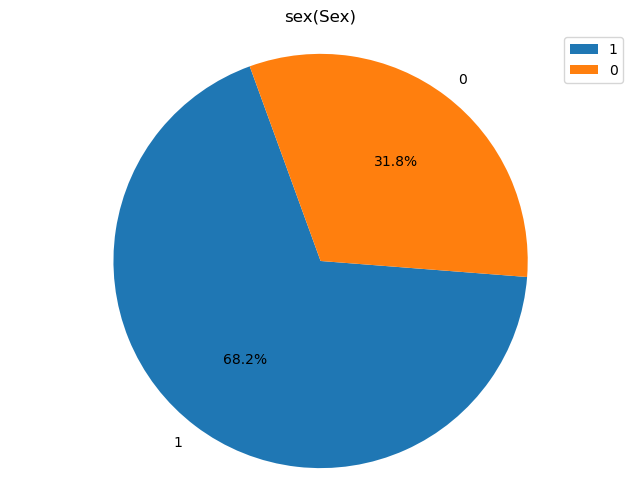

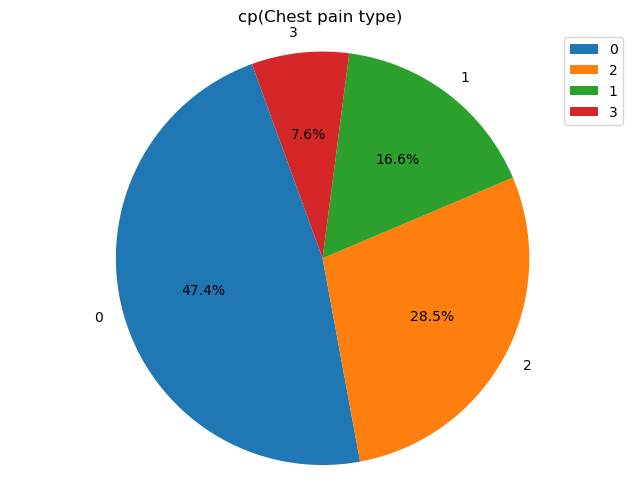

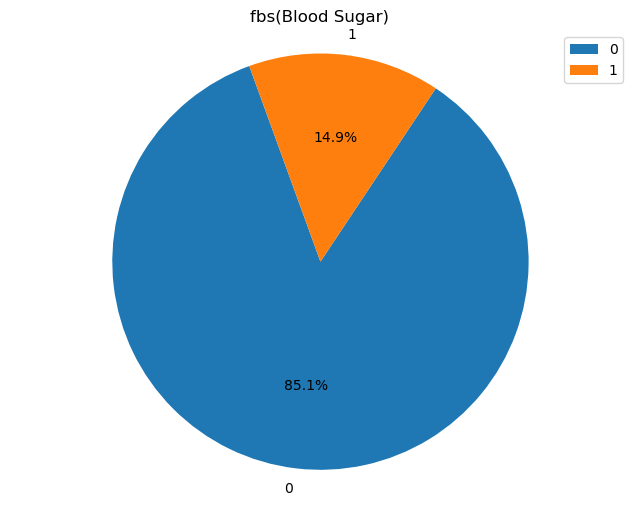

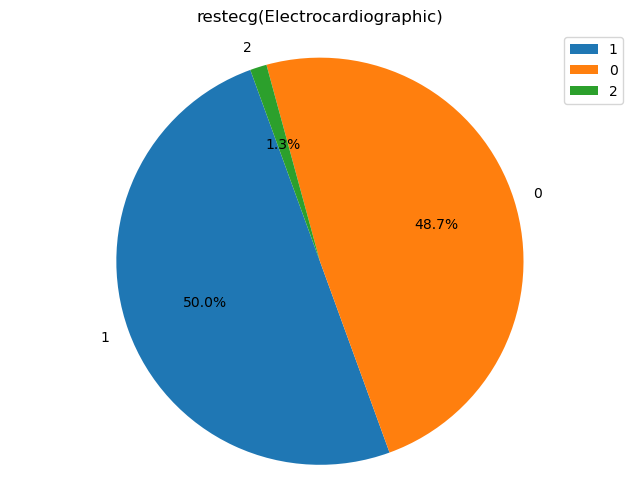

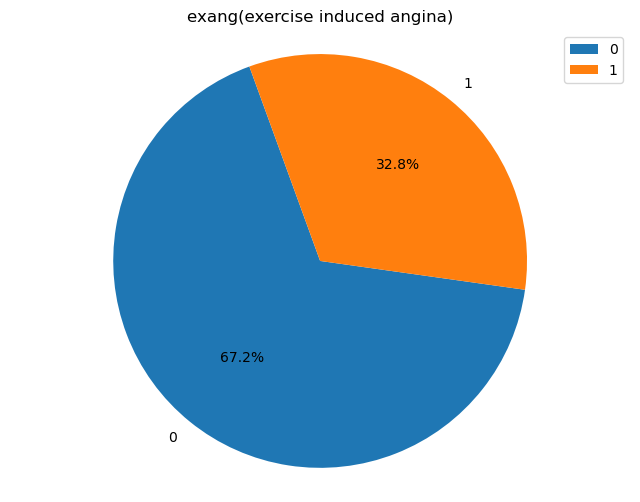

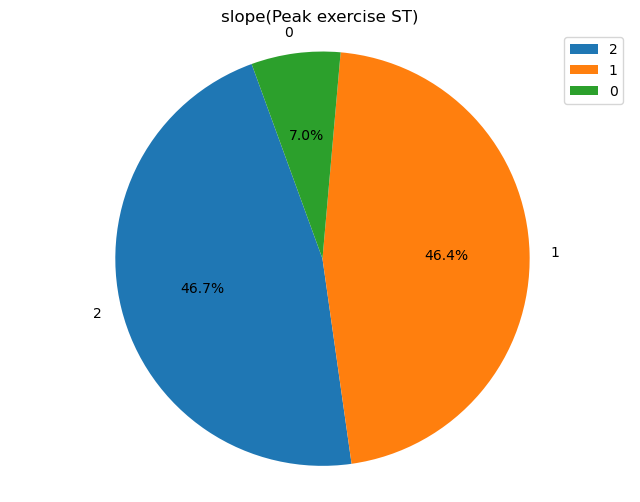

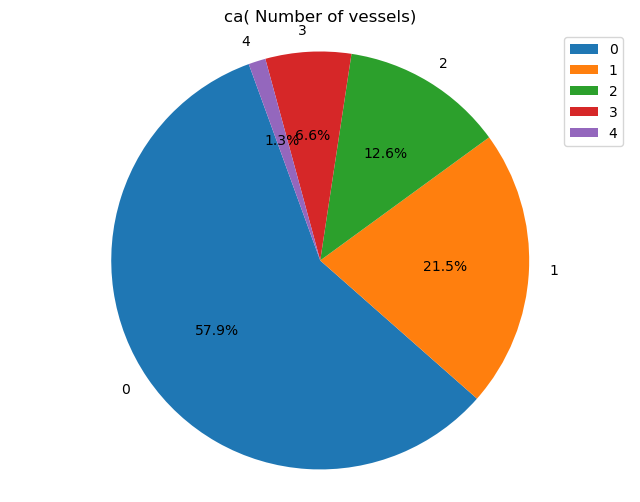

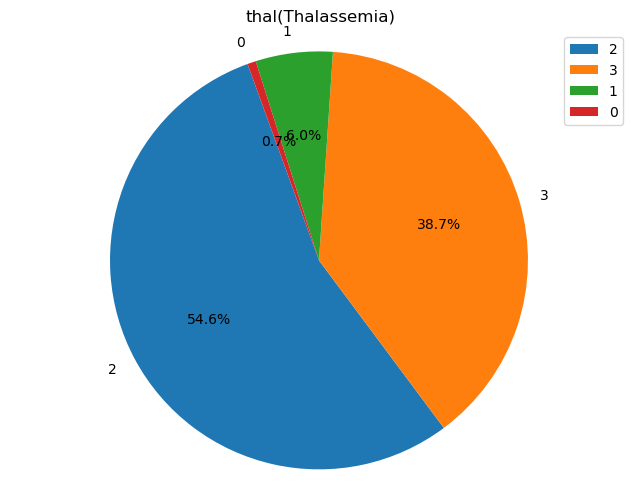

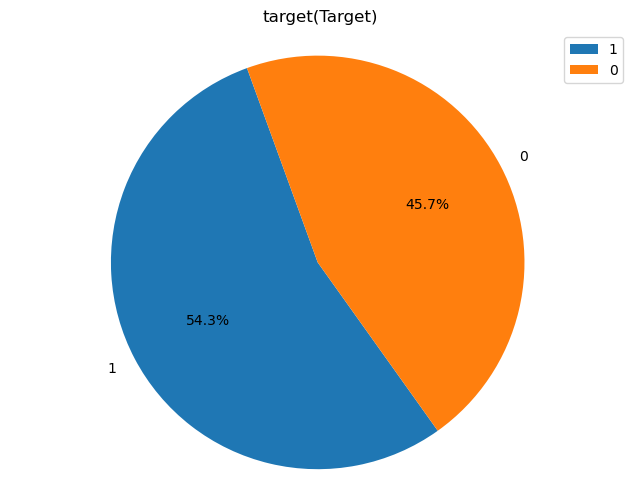

In [766]:
label_font = {'family':'arial' , 'color' : 'darkred' , 'weight' : 'bold' , 'size' : 15}
axis_font = {'family':'arial' , 'color' : 'darkblue' , 'weight' : 'bold' , 'size' : 13}

for i , z in list(zip(categorical_var,categorical_axis_name)):
    fig , ax = plt.subplots(figsize=(8,6))
    
    observation_values = list(df_heart[i].value_counts().index)
    total_observation_values = list(df_heart[i].value_counts())
    
    ax.pie(total_observation_values,labels=observation_values, autopct="%1.1f%%",startangle=110,labeldistance=1.1)
    ax.axis("equal")
    
    plt.title(i + "(" + z + ")")
    plt.legend()
    plt.show()

In [767]:
# Correlation analysis: 

In [768]:
df_heart[numerical_var].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


In [769]:
df_heart[numerical_var].corr().iloc[:,[-2]]

,thalach
age,-0.395235
trestbps,-0.048023
chol,-0.005308
thalach,1.000000
oldpeak,-0.342201


C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


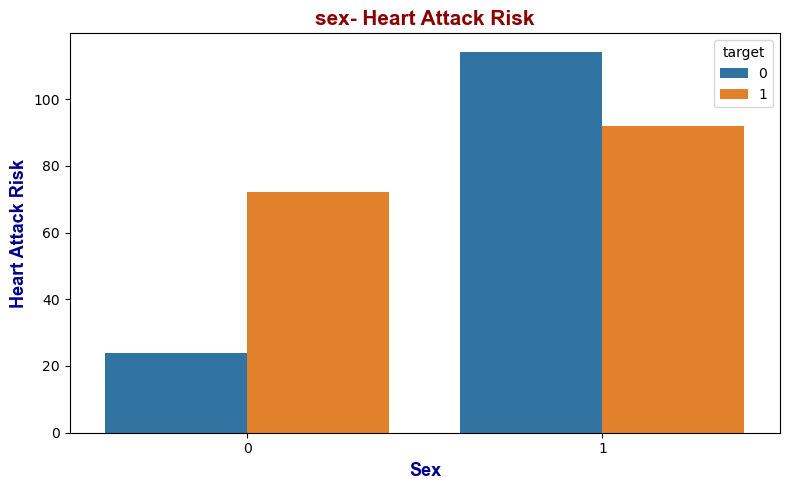

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


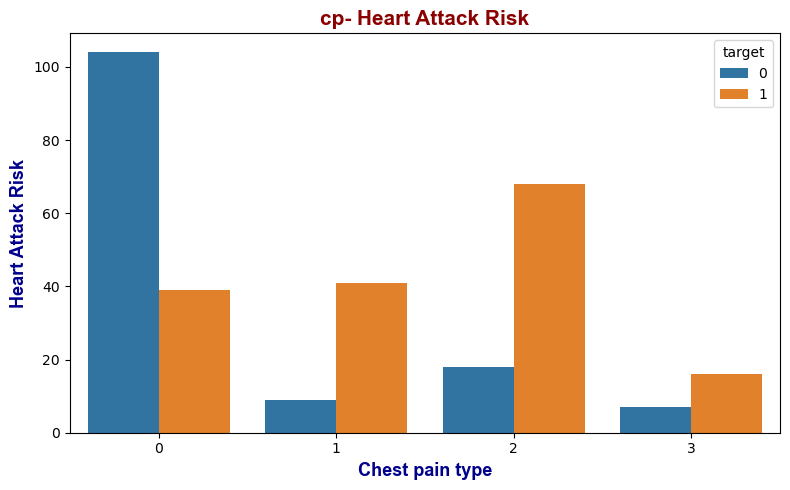

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


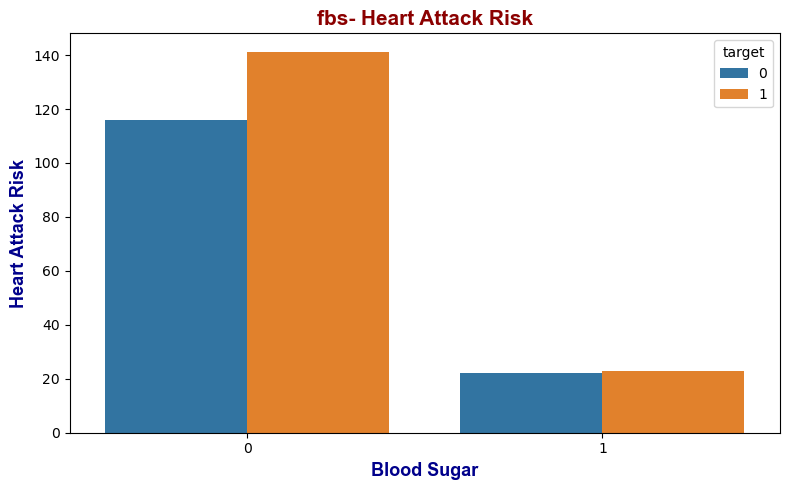

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


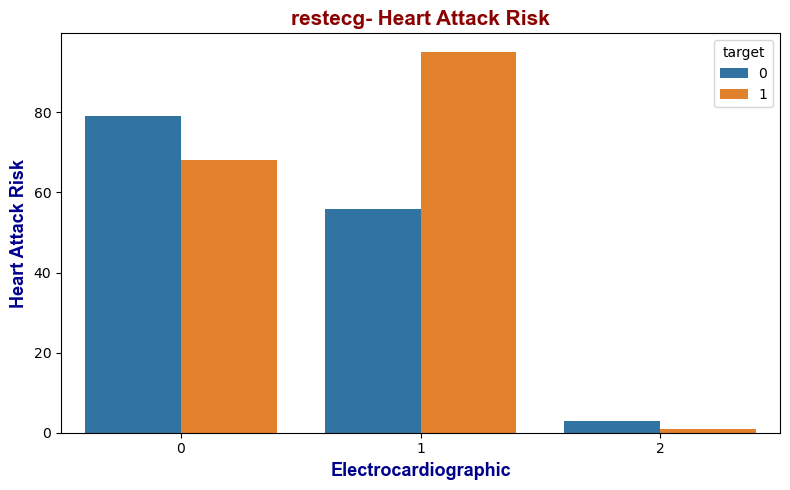

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


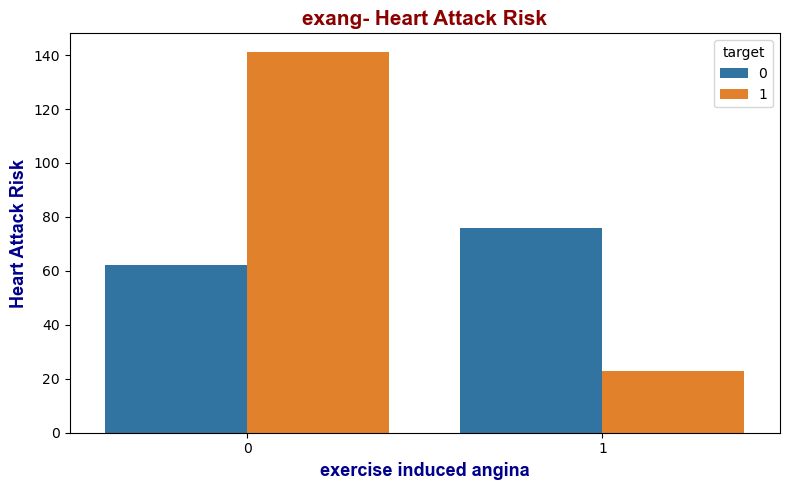

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


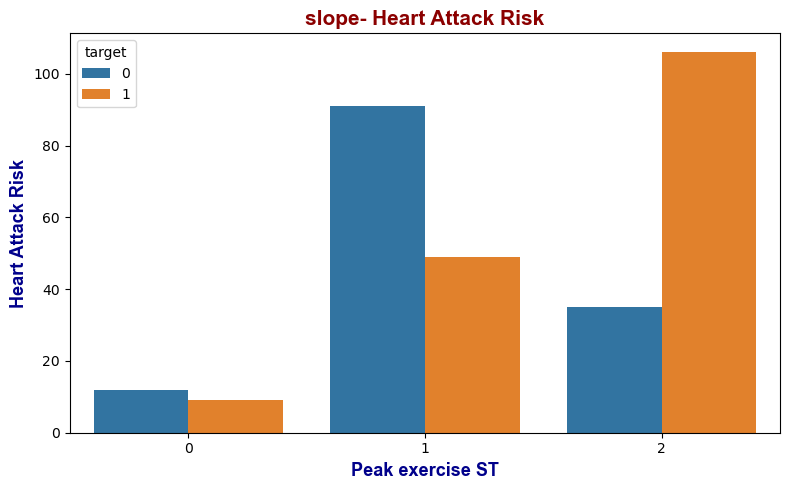

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


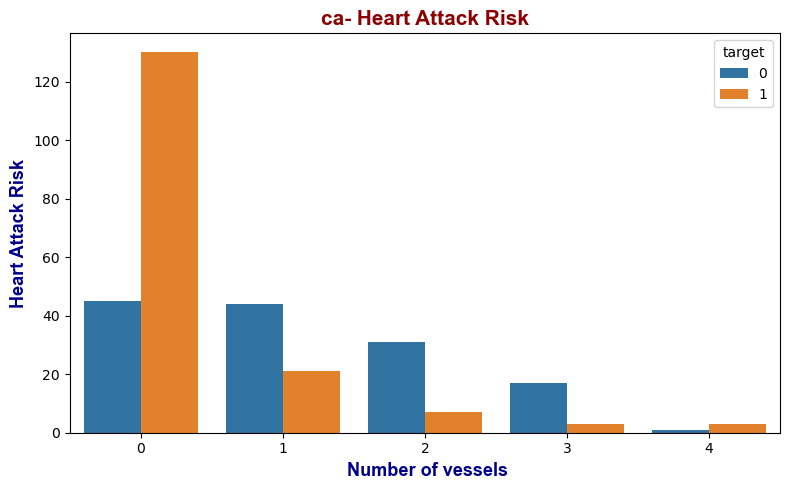

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


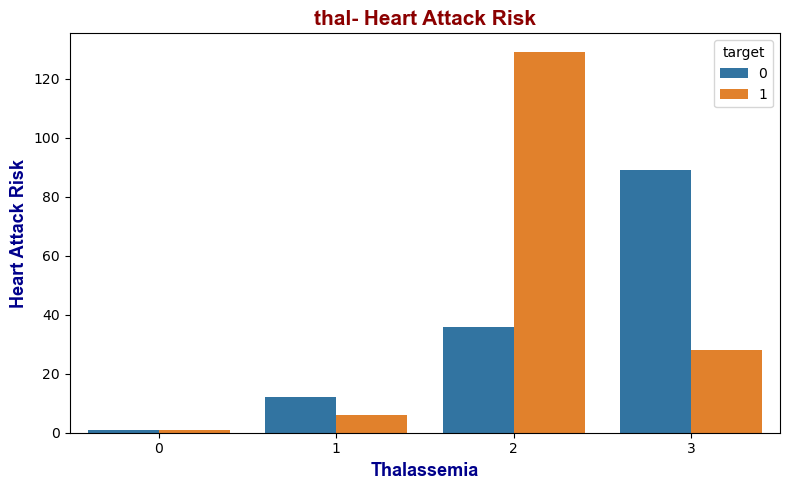

C:\Users\47939\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\47939\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


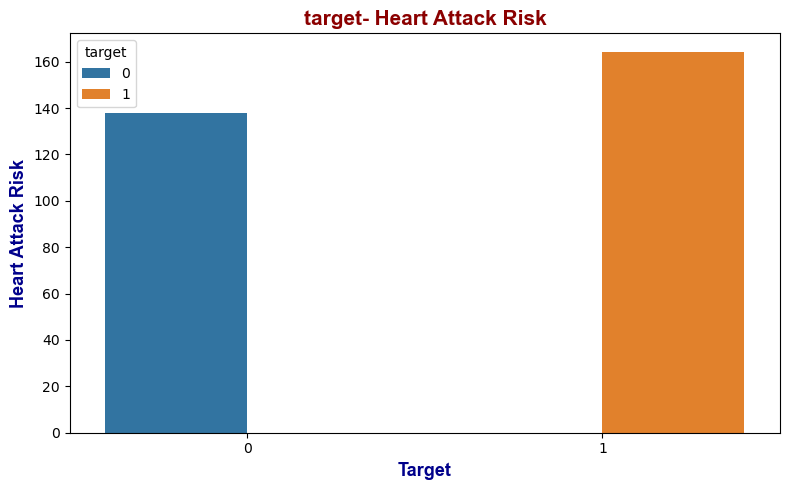

In [770]:
label_font = {'family':'arial' , 'color':'darkred' , 'weight' : 'bold' , 'size' : 15}
axis_font = {'family':'arial' , 'color':'darkblue' , 'weight' : 'bold' , 'size' : 13}

for i ,z in list(zip(categorical_var,categorical_axis_name)):
    plt.figure(figsize=(8,5))
    sns.countplot(x= i , data = df_heart[categorical_var], hue = "target")
    
    plt.title(i + "- Heart Attack Risk",fontdict=label_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel("Heart Attack Risk",fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

In [771]:
df_heart[categorical_var].corr().iloc[:,[-1]]
# cp and exang has the most corelation (Moderate Correlation) . fbs and restecg has least corelation

,target
sex,-0.283609
cp,0.432080
fbs,-0.026826
restecg,0.134874
exang,-0.435601
slope,0.343940
ca,-0.408992
thal,-0.343101
target,1.000000


In [772]:
# Checking corrlation befor and after transformation!
df_heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

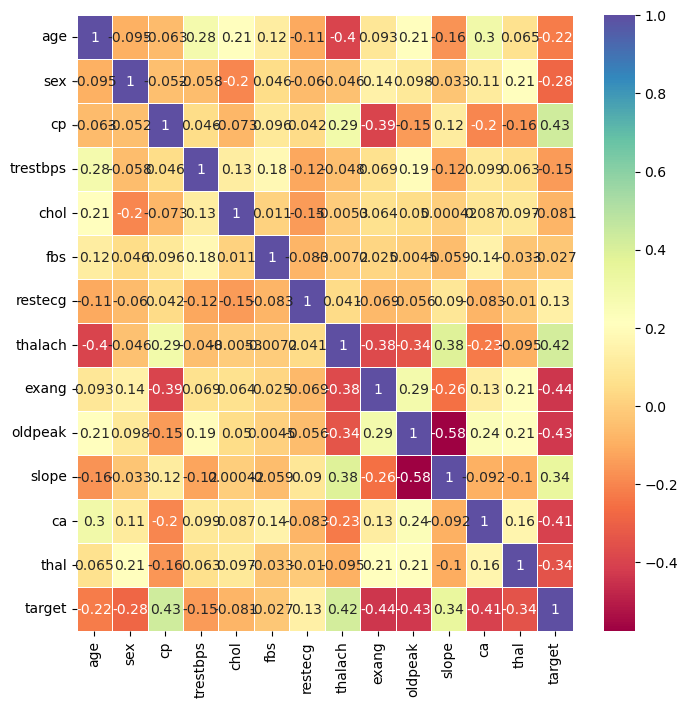

In [773]:
# Before :
plt.figure(figsize=(8,8))
sns.heatmap(df_heart.corr(),annot=True,cmap="Spectral",linewidths=0.5)

In [774]:
#After doing normalization and scaled value to see the difference in correlation matrix

In [775]:
from sklearn.preprocessing import QuantileTransformer

numeric_columns = df_heart.select_dtypes(include=['float64', 'int64']).columns

# Apply QuantileTransformer to only numeric columns
transformer = QuantileTransformer(output_distribution='normal')
df_heart_nor = transformer.fit_transform(df_heart[numeric_columns])

C:\Users\47939\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (302). n_quantiles is set to n_samples.
  warnings.warn(


In [776]:
#Feature Scaling with Robust Scaler Method

In [777]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(df_heart_nor)

In [778]:
df_scaled = df_scaled = pd.DataFrame(data=scaled_data, columns=numeric_columns)

In [779]:
df_new_heart = pd.concat([df_scaled,df_heart[categorical_var]],axis=1)

<AxesSubplot:>

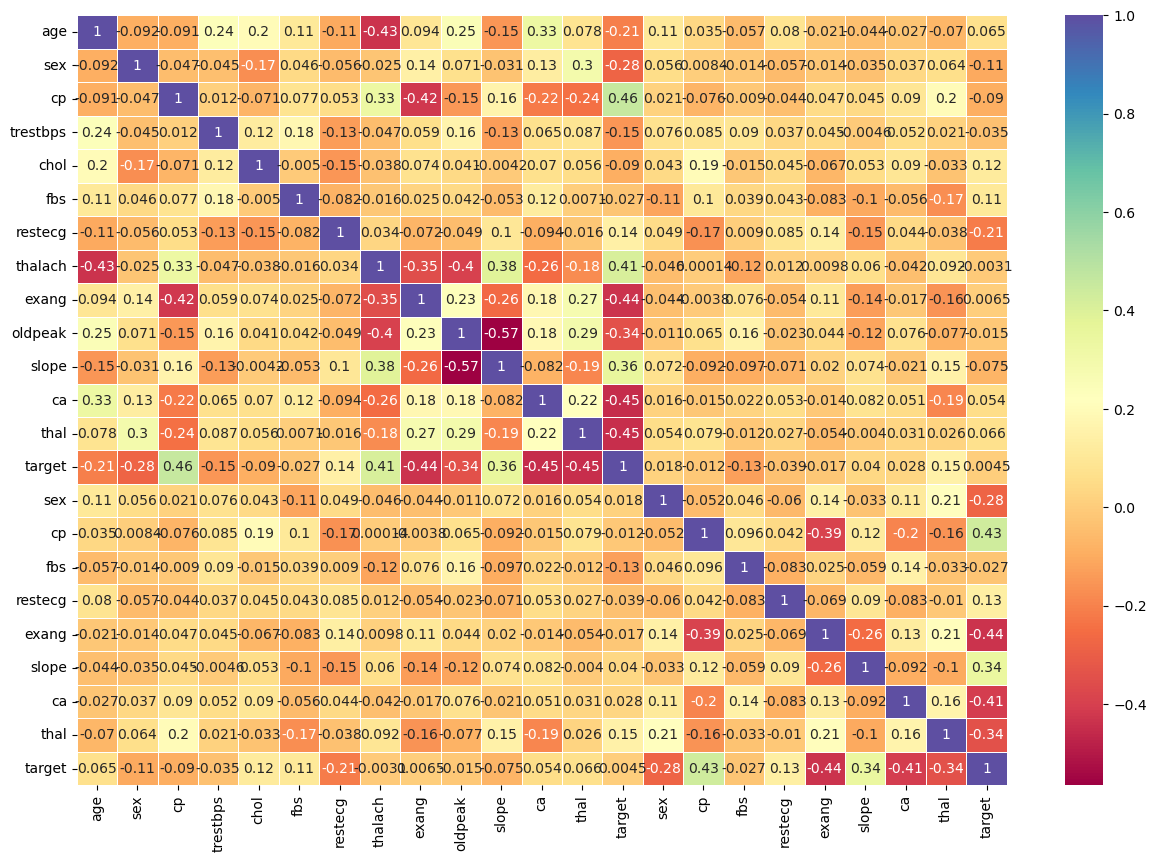

In [780]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new_heart.corr(),annot=True,cmap="Spectral",linewidths=0.5)

# Encoding and data preparation!

In [781]:
# Firsly, convert categorical data into dummies variables.
dataset = pd.get_dummies(df_heart, columns = categorical_var)

In [782]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
dataset[numerical_var] = robustScaler.fit_transform(dataset[numerical_var])


In [783]:
dataset.head(3)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,-0.269231,-0.25,-0.447059,0.473282,0.1250,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,-0.192308,0.50,-0.588235,0.076336,1.4375,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1.115385,0.75,-1.043137,-0.839695,1.1250,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0


# Splitting the data for train and test

In [784]:
columns_to_drop = ['target_0', 'target_1']
X = dataset.drop(columns=columns_to_drop)

In [785]:
Y = df_heart['target']

In [786]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [787]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [788]:
X_train.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [789]:
Y_train

119    1
267    0
348    0
628    1
89     0
      ..
125    1
96     1
18     1
355    1
113    0
Name: target, Length: 241, dtype: int64

In [790]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
11,-0.961538,0.1,1.576471,-0.503817,1.375,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
652,0.807692,1.0,-0.227451,-1.175573,1.125,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
512,-0.884615,-0.9,0.776471,0.015267,-0.500,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
498,-0.115385,0.5,-0.023529,0.229008,0.250,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
108,-1.192308,1.1,-0.274510,0.870229,-0.500,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.115385,-1.0,-0.541176,-1.358779,-0.500,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
27,0.192308,0.3,1.231373,-0.015267,-0.500,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
191,0.038462,0.0,-0.305882,0.320611,-0.500,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
175,0.038462,3.5,0.745098,-0.595420,2.000,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [791]:
Y_test

11     0
652    1
512    0
498    1
108    0
      ..
109    0
27     0
191    1
175    0
45     1
Name: target, Length: 61, dtype: int64

In [792]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (241, 30)
X_test shape: (61, 30)
Y_train shape: (241,)
Y_test shape: (61,)


# Training

# Decision Tree

In [793]:
from sklearn.tree import DecisionTreeClassifier
classification_tree=DecisionTreeClassifier(max_depth = 7)
classification_tree_max=DecisionTreeClassifier()

In [794]:
classification_tree.fit(X_train,Y_train)
classification_tree_max.fit(X_train,Y_train)

DecisionTreeClassifier()

In [795]:
# Finding maximum depth of the tree.
print(classification_tree_max.tree_.max_depth)

9


In [796]:
print(classification_tree.get_depth()) #Return the depth of the decision tree.
print(classification_tree.get_n_leaves()) #Return the number of leaves of the decision tree.
print(classification_tree.score(X_train, Y_train)) #Return the mean accuracy on the given test data and labels.

7
36
0.983402489626556


In [797]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

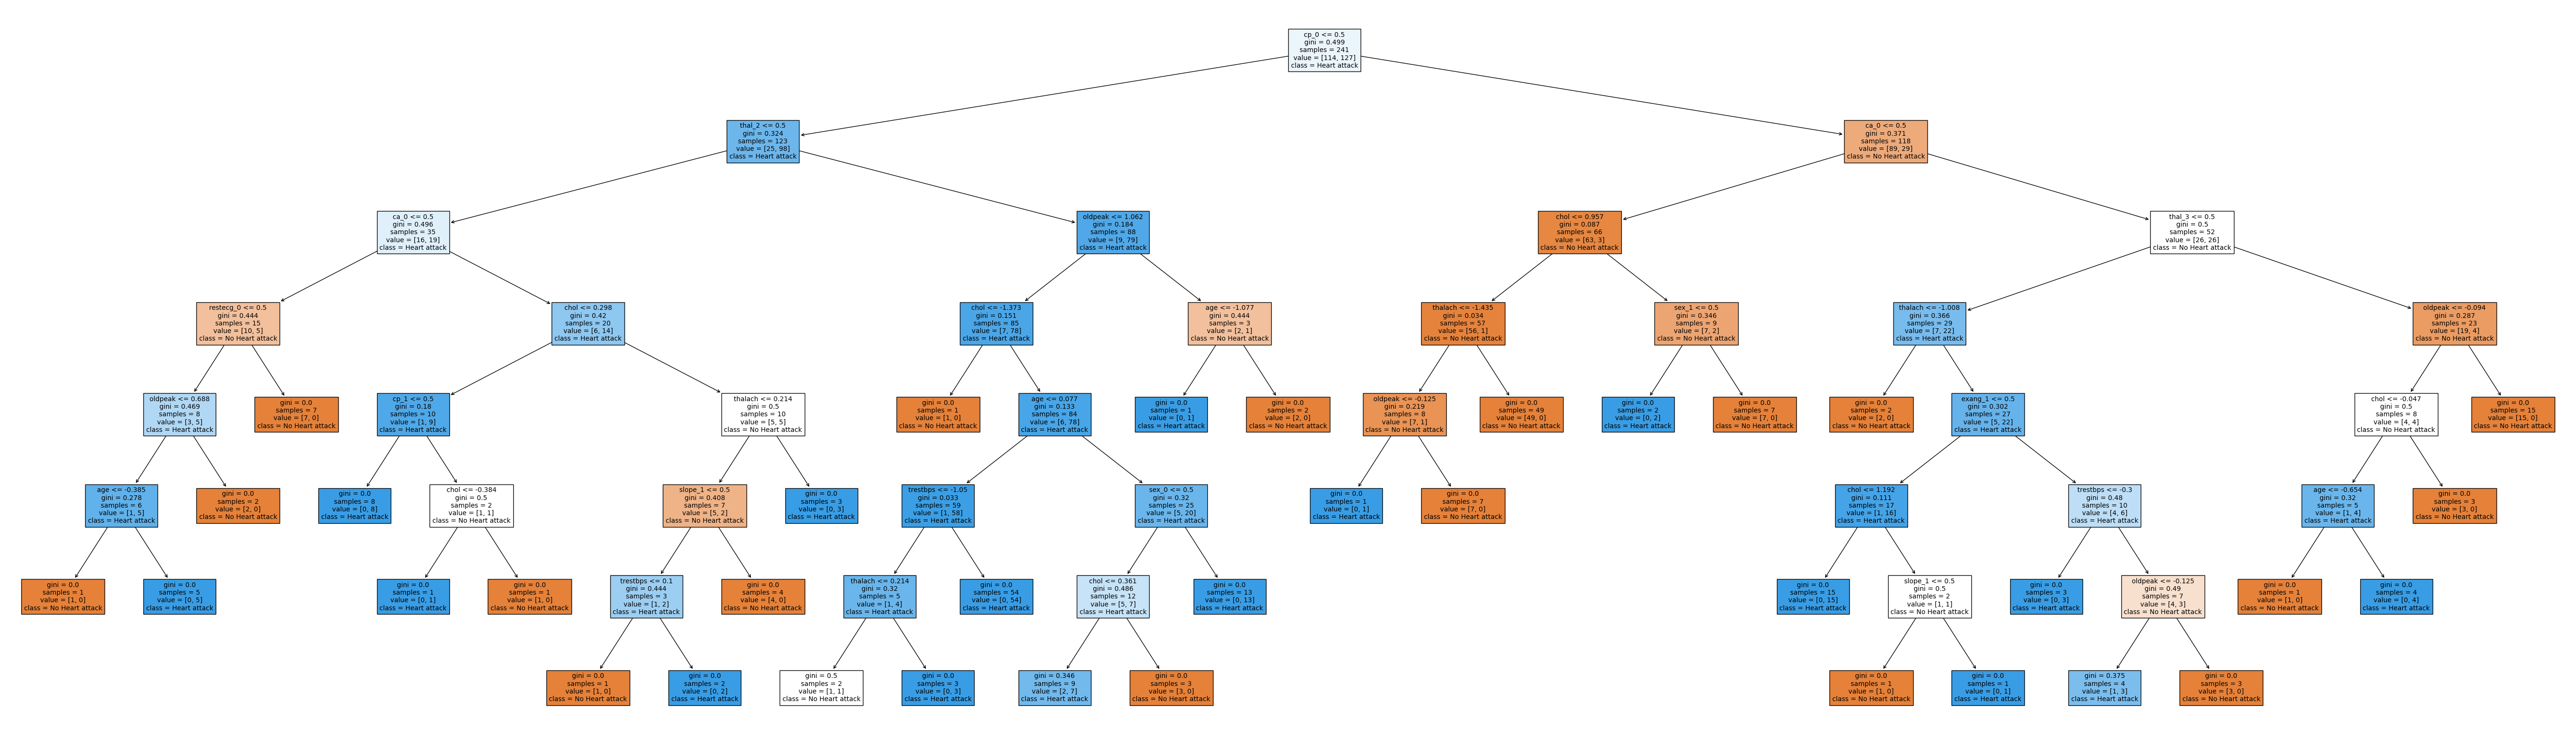

In [798]:
#Decision tree at depth 7
feature_names = X_train.columns
feature_names

fig = plt.figure(figsize=(70,20))
_ = plot_tree(classification_tree,
                  feature_names=feature_names,
                  class_names={0:'No Heart attack', 1:'Heart attack'},
                  filled=True,
                  fontsize=10)


In [799]:
# 36 leaves at the depth of 7 with the accuracy of 98%

<AxesSubplot:>

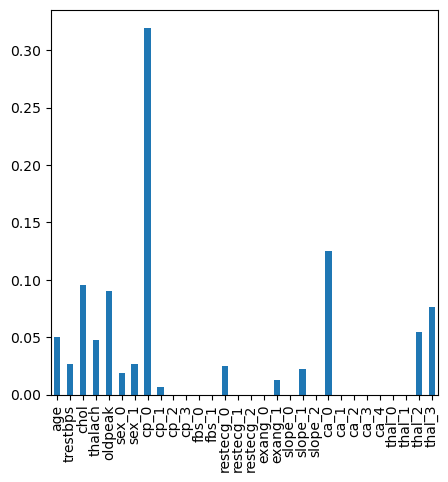

In [800]:
# feature important for tree at depth 7
feature_importance = pd.DataFrame(classification_tree.feature_importances_, index = feature_names)
feature_importance.plot(kind='bar', legend=None) 

In [801]:
clf_final.feature_importances_

array([0.05018184, 0.02344445, 0.0534698 , 0.01538058, 0.13512387,
       0.        , 0.        , 0.26969099, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03086581, 0.        ,
       0.        , 0.04260781, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03307051, 0.34616434, 0.        ])

In [802]:
Y_pred=clf_final.predict(X_test)

In [803]:
Y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [804]:
from sklearn.metrics import accuracy_score

In [805]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=['No Heart attack', 'No Heart attack']))

                 precision    recall  f1-score   support

No Heart attack       0.83      0.62      0.71        24
No Heart attack       0.79      0.92      0.85        37

       accuracy                           0.80        61
      macro avg       0.81      0.77      0.78        61
   weighted avg       0.81      0.80      0.80        61



In [806]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred) 

array([[15,  9],
       [ 3, 34]], dtype=int64)

# Optimal prunning? for decision tree!
When using cost-complexity pruning, which of the following alphas would lead to the highest expected rate of return: ( 0.00001, 0.0001,0.0002,0.0005,0.0008,0.001, 0.01, 0.1)?

Which of the following maximal depths would lead to the highest expected return: (None, 1, 2, 3, 4, 5, 6 , 7, 8,9 ) max depth is 9.



In [807]:

from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
c_scores = []
for c in ( 0.00001, 0.0001,0.0002,0.0005,0.0008,0.001, 0.01, 0.1):
    scores = cross_val_score(DecisionTreeClassifier(ccp_alpha=c), X_train, Y_train, cv=10, scoring='accuracy' )
    c_scores.append(scores.mean())
print(c_scores)

[0.7805000000000001, 0.7633333333333334, 0.7633333333333334, 0.7633333333333334, 0.7638333333333334, 0.7553333333333334, 0.7636666666666667, 0.7221666666666667]


In [808]:
d_scores = []
for d in (None, 1, 2 , 3, 4, 5, 6, 7, 8, 9 ):
    scores = cross_val_score(DecisionTreeClassifier(max_depth=d), X_train, Y_train, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())
print(d_scores)

[0.7346666666666667, 0.7221666666666667, 0.718, 0.7678333333333333, 0.7471666666666665, 0.7515, 0.7635000000000001, 0.7511666666666666, 0.7593333333333334, 0.7343333333333332]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

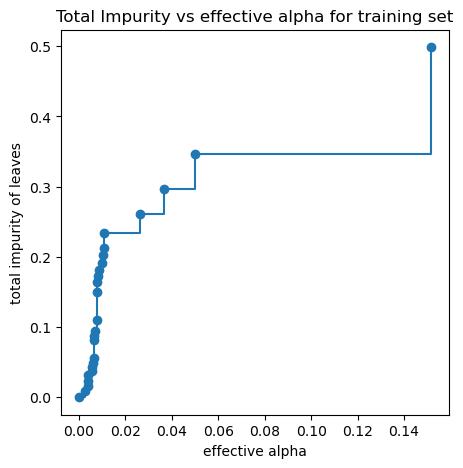

In [809]:
# Graph: trade of between impurity and effective alpha
path = classification_tree_max.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

### Weighting and Hyperparameter Grid Search


In [810]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9], 'class_weight':[{0:1,1:2}, {0:1,1:3},{0:1,1:4},{0:1,1:5},{0:1,1:6}]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier( ), parameters, verbose=1, cv=10, scoring = 'accuracy')

grid_search_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5},
                                          {0: 1, 1: 6}],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=1)

In [811]:
grid_search_cv.best_estimator_


DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=4)

In [812]:
# Fitting the final Decision tree with best estimators.
clf_final = DecisionTreeClassifier(max_depth=4, class_weight={0:1,1:3})
clf_final = clf_final.fit(X_train, Y_train)

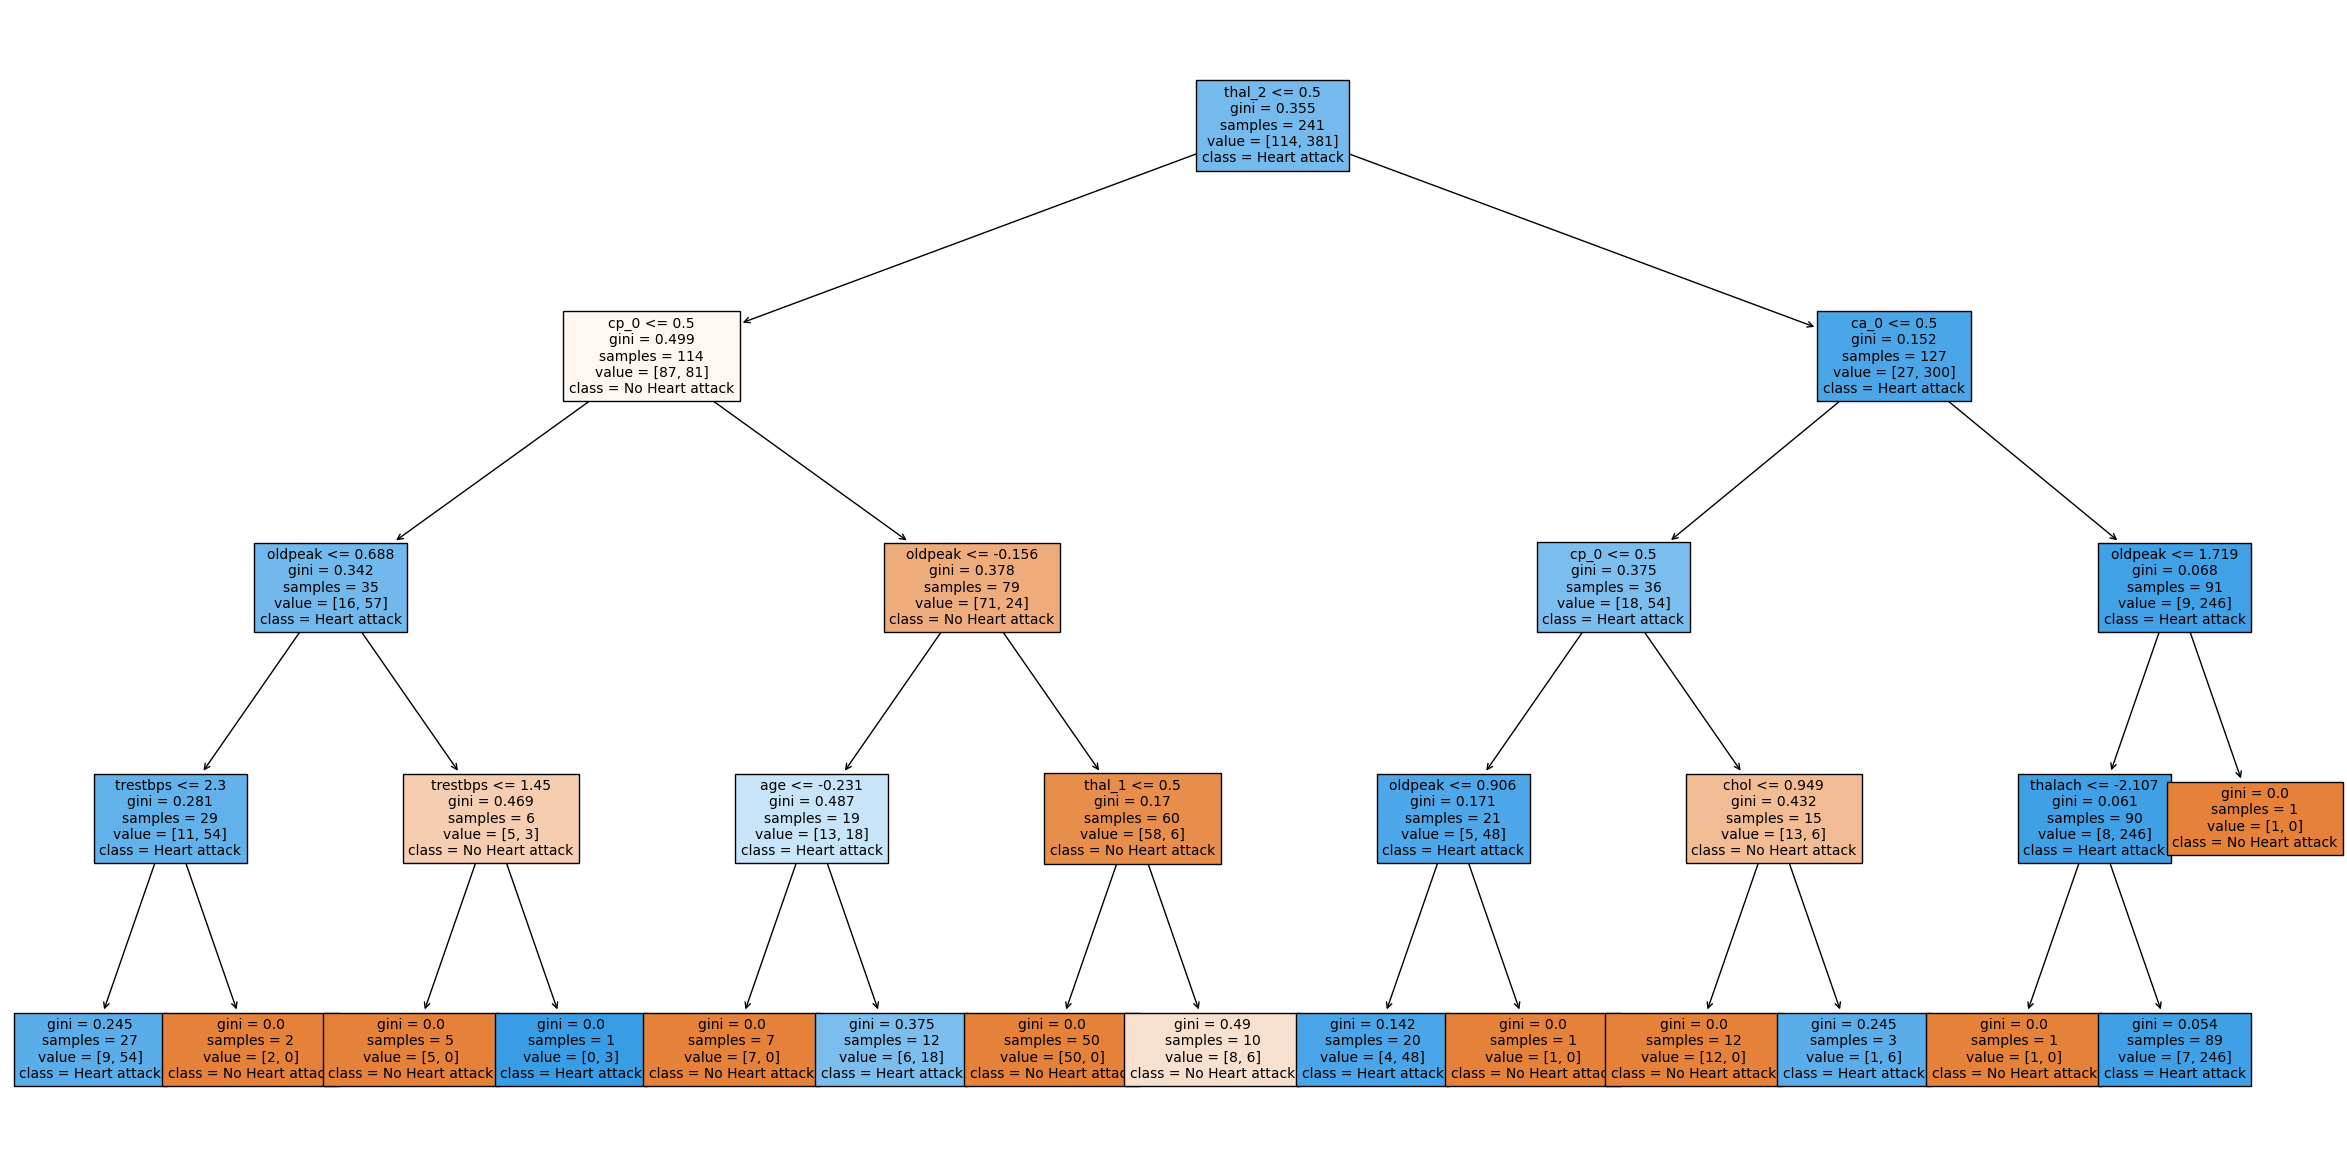

In [813]:
feature_names = X_train.columns
feature_names

fig = plt.figure(figsize=(30,15))
_ = plot_tree(clf_final,
                  feature_names=feature_names,
                  class_names={0:'No Heart attack', 1:'Heart attack'},
                  filled=True,
                  fontsize=10)


In [814]:
print('The fully accuracy of the fully grown tree is ', classification_tree_max.score(X_test, Y_test))
ac_dt = clf_final.score(X_test, Y_test)
print('The fully accuracy of the pruned tree is ', clf_final.score(X_test, Y_test))

The fully accuracy of the fully grown tree is  0.7049180327868853
The fully accuracy of the pruned tree is  0.7704918032786885


In [815]:
#Accuracy score for final tree
tree_ac = clf_final.score(X_test, Y_test)

In [816]:
# Mean square error of final Decision Tree
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.4435327625727437


<AxesSubplot:>

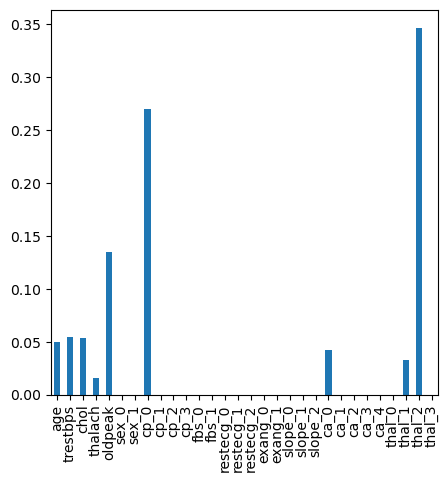

In [817]:
# Feature important for final tree
feature_importance = pd.DataFrame(clf_final.feature_importances_, index = feature_names)
feature_importance.plot(kind='bar', legend=None) 

# Logistic Regression

In [818]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
heart_attack_model = LogisticRegression(class_weight='balanced')
heart_attack_model.fit(X_train,Y_train)
y_pred = heart_attack_model.predict(X_test)
accuracy_logistic  = accuracy_score(Y_test,y_pred)
report_logistic  = classification_report(Y_test,y_pred)
print("Model accuracy for logistic model:", accuracy_logistic)

print("Classification report for logistic model :", report_logistic)

Model accuracy for logistic model: 0.8524590163934426
Classification report for logistic model :               precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.83      0.95      0.89        37

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



In [819]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[17  7]
 [ 2 35]]


In [820]:
y_pred=heart_attack_model.predict(X_test)

In [821]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

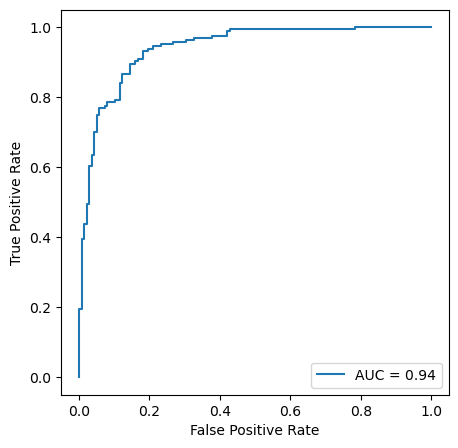

In [822]:
#Drawing ROC curve graph
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = heart_attack_model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(Y, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# KNN

In [823]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#Training score for 30 values of k
knn_score = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y, cv=15)
    knn_score.append(np.mean(score))

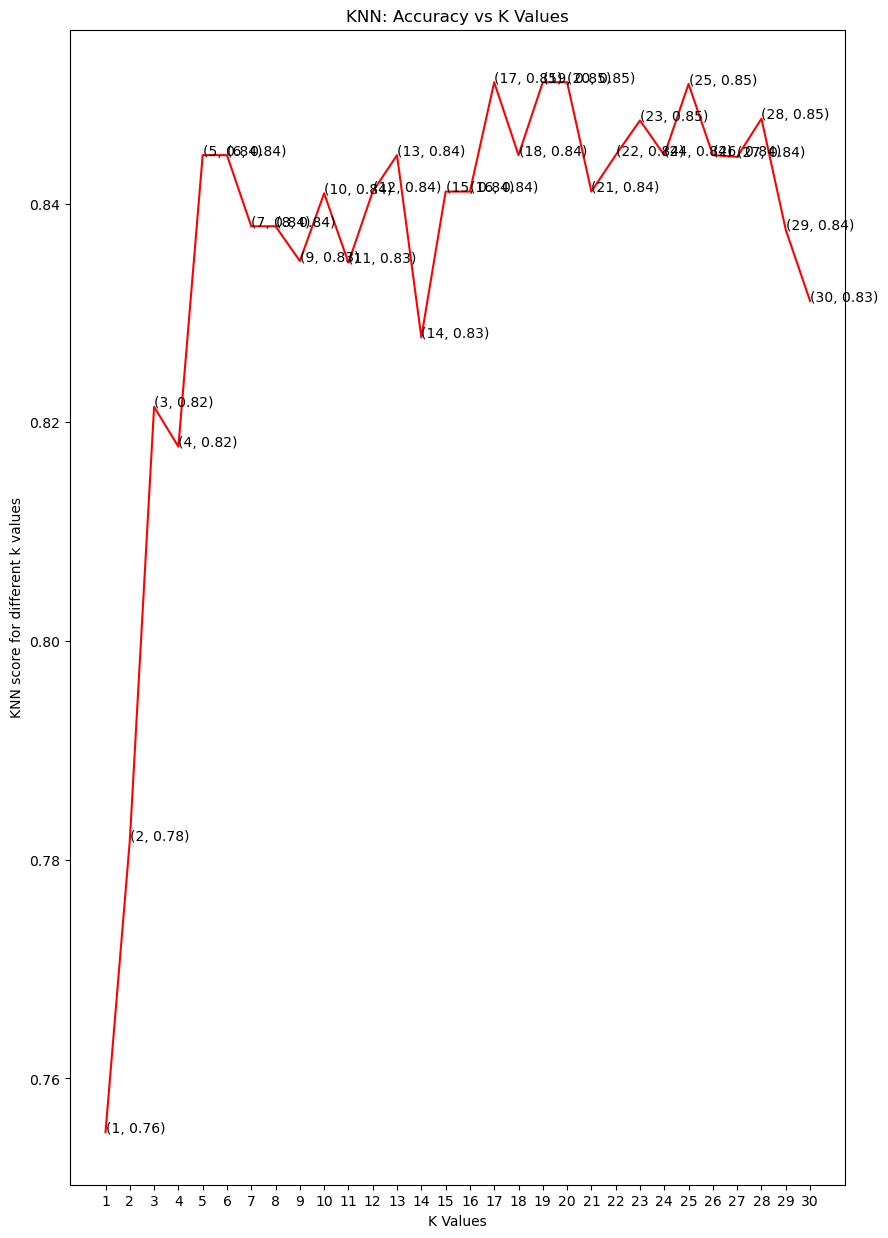

In [824]:
# Visulization of k values vs Traning accuracy
import matplotlib.pyplot as plt
k_values = list(range(1, 31))
plt.figure(figsize=(10, 15))
plt.plot(k_values, knn_score, color='red')
for i in range(1, 31):
    plt.text(i, knn_score[i-1], f'({i}, {knn_score[i-1]:.2f})')
plt.xticks([i for i in range(1, 31)])
plt.xlabel('K Values')
plt.ylabel('KNN score for different k values')
plt.title('KNN: Accuracy vs K Values')
plt.show()


In [825]:
# Searching for optimal value of k
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Best k value:", grid_search.best_params_['n_neighbors'])



Best k value: 13


In [826]:
#Fitting final KNN model with k= 13
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors = 13)# increase the accuracy from 82 to 89 %.

In [827]:
knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [828]:
Y_pred=knn_classifier.predict(X_test)

In [829]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [830]:
ac_knn

0.8032786885245902

## Random Forest and Bagging

In [831]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier=RandomForestClassifier(n_estimators=9, random_state = 123)

In [832]:
randomforest_classifier.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=9, random_state=123)

In [833]:
Y_pred=randomforest_classifier.predict(X_test)

In [834]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [835]:
print(ac_rf)
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.7868852459016393
0.4616435357484827


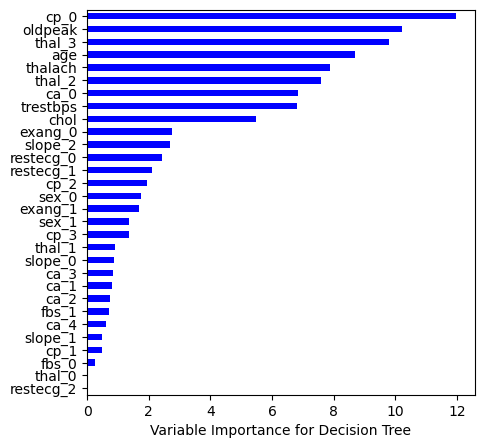

In [836]:
# Feature important for Random Forest
Importance = pd.DataFrame({'Importance':randomforest_classifier.feature_importances_*100}, 
                          index = X.columns) 

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh',  
                                              color = 'b', )

plt.xlabel('Variable Importance for Decision Tree')
plt.gca().legend_ = None

In [837]:
#Creating Bagging model
# Bagging is just simply a special case of a random forest with  𝑚=𝑝
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
bagged_heart = BaggingClassifier(clf_final, n_estimators=30, random_state=123)
bagged_heart.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = bagged_heart.predict(X_test)

# Evaluate the accuracy
bagged_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Bagged Accuracy: {bagged_accuracy}")
# better accuracy then Decision tree!

Bagged Accuracy: 0.7868852459016393


In [838]:
#MSE of Bagging
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))
# also smaller mean square error!

0.4616435357484827


## Boosting :

In [839]:
# Creating Boosting model with 500 trees
from sklearn.ensemble import GradientBoostingRegressor
boosted_heart = GradientBoostingRegressor(n_estimators = 500, #Number of trees
                                           learning_rate = 0.01,  #lambda
                                           max_depth = 4, 
                                           random_state = 1)

boosted_heart.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1)

In [840]:
# Finding optimal parameters
boosted_heart = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=123)
boosted_heart.fit(X_train, Y_train)
errors = [mean_squared_error(Y_test, Y_pred) for Y_pred in boosted_heart.staged_predict(X_test)]

# Find the optimal number of trees using early stopping
best_n_estimators = np.argmin(errors) + 1

# Retrain the model with the optimal number of trees
final_boosted_heart = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=0.01, max_depth=4, random_state=1)
final_boosted_heart.fit(X_train, Y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=185,
                          random_state=1)

In [841]:
# Number of optimal tree is 185
Y_pred_boost = final_boosted_heart.predict(X_test)
threshold = 0.5
Y_boost_binary = (Y_pred_boost > threshold).astype(int)
boost_accuracy = accuracy_score(Y_test, Y_boost_binary)
print(f"Boosting Accuracy: {boost_accuracy}")




Boosting Accuracy: 0.8032786885245902


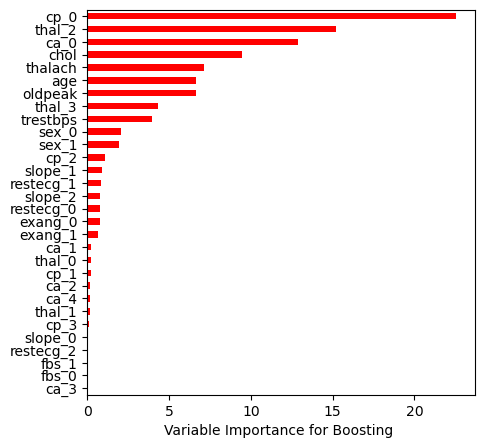

In [842]:
#Feature important of Boosting
feature_importance = boosted_heart.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance for Boosting ')

plt.gca().legend_ = None

In [843]:
# MSE of Boosting
np.sqrt(mean_squared_error(Y_test, boosted_heart.predict(X_test)))#smaller MSE.

0.4339298109444767

## Support Vector Machine

In [844]:
from sklearn.svm import SVC

In [845]:
# Creating SVM with linear kernel
svc_heart = SVC(C=1, kernel='linear') # making assumption :linear


In [846]:
svc_heart.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

In [847]:
Y_pred=svc_heart.predict(X_test)

In [848]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [849]:
ac_sv

0.819672131147541

In [850]:
#Searching for optimal value of C
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 0.2, 1, 5, 10, 100, 125, 150, 200]}]
clf_svc = GridSearchCV(SVC(kernel='linear'), 
                   tuned_parameters, 
                   cv=15, 
                   scoring='accuracy')
clf_svc.fit(X_train, Y_train)

GridSearchCV(cv=15, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.2, 1, 5, 10, 100, 125, 150,
                                200]}],
             scoring='accuracy')

In [851]:
clf_svc.best_params_

{'C': 0.01}

In [852]:
# Prediction using best params of c
svc_linear = SVC(C=0.01, kernel='linear')
svc_linear.fit(X_train, Y_train)
Y_pred = svc_linear.predict(X_test)
pd.DataFrame(confusion_matrix(Y_test, Y_pred).T, index=svc_linear.classes_, columns=svc_linear.classes_)

,0,1
0,16,2
1,8,35


In [853]:
ac_sv_l=accuracy_score(Y_test,Y_pred)
ac_sv_l

0.8360655737704918

In [854]:
#Finding optimal params for non linearity kernel :
tuned_parameters = [{'C': [0.001, 0.01,0.03, 0.1, 0.2, 1, 5, 10, 100, 125, 150, 200],
                     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
clf_nonli = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=15, scoring='accuracy')
clf_nonli.fit(X_train, Y_train)
clf_nonli.best_params_

{'C': 100, 'gamma': 0.01}

In [855]:
print(confusion_matrix(Y_test, clf_nonli.best_estimator_.predict(X_test)))
print(clf_nonli.best_estimator_.score(X_test, Y_test))

[[15  9]
 [ 5 32]]
0.7704918032786885


In [856]:
svm_ac = clf_nonli.best_estimator_.score(X_test, Y_test)
svm_ac

0.7704918032786885

In [857]:
# In this case,maybe linear kerel is better

In [858]:
# Instead of accuracy, using roc to measure the difference between big value of C and small value of C
# Running model with 2 value of C at gamma = 1, 200
from sklearn.metrics import roc_curve, auc
svm_small = SVC(C=1, kernel='linear')
svm_small.fit(X_train, Y_train)
svm_big = SVC(C=200, kernel='linear')
svm_big.fit(X_train, Y_train)

SVC(C=200, kernel='linear')

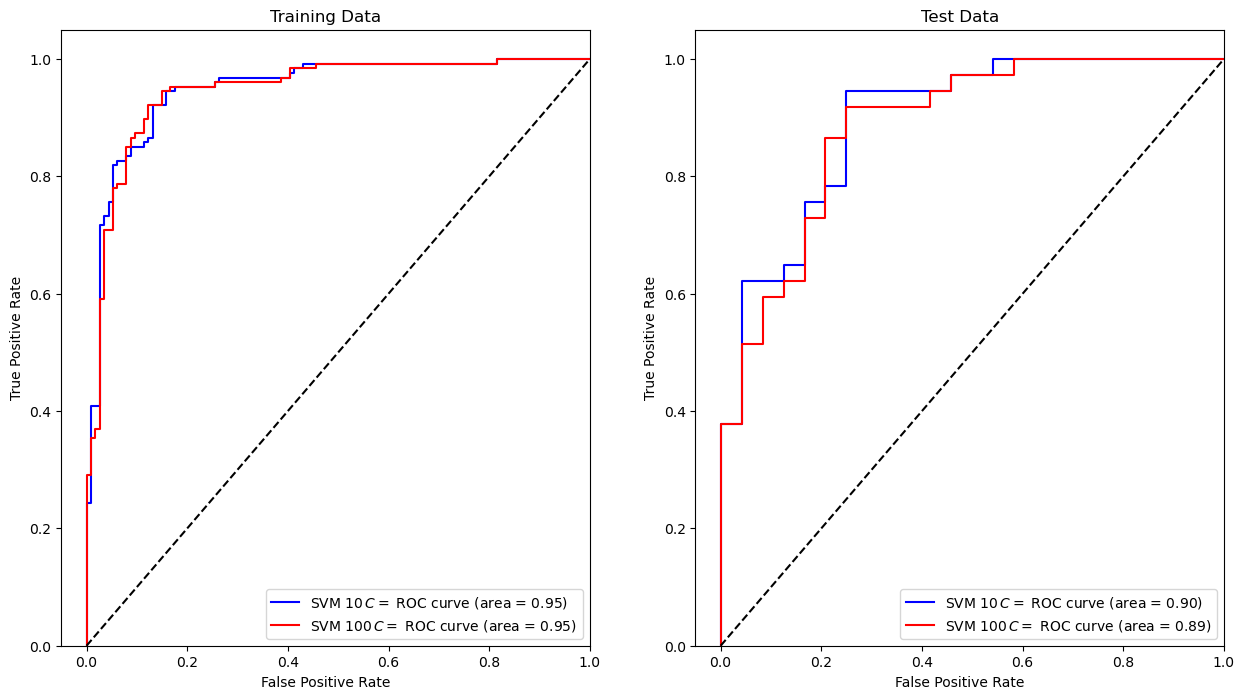

In [859]:
y_train_score3 = svm_small.decision_function(X_train)
y_train_score4 = svm_big.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(Y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(Y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.plot(false_pos_rate3, true_pos_rate3, label=r'SVM $10\,C = $ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label=r'SVM $100\,C = $ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score5 = svm_small.decision_function(X_test)
y_test_score6 = svm_big.decision_function(X_test)

false_pos_rate5, true_pos_rate5, _ = roc_curve(Y_test, y_test_score5)
roc_auc5 = auc(false_pos_rate5, true_pos_rate5)

false_pos_rate6, true_pos_rate6, _ = roc_curve(Y_test, y_test_score6)
roc_auc6 = auc(false_pos_rate6, true_pos_rate6)

ax2.plot(false_pos_rate5, true_pos_rate5, label=r'SVM $10\,C = $ ROC curve (area = %0.2f)' % roc_auc5, color='b')
ax2.plot(false_pos_rate6, true_pos_rate6, label=r'SVM $100\,C = $ ROC curve (area = %0.2f)' % roc_auc6, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

plt.show()



### PCA , Model Selection Method :


In [860]:
#One main consideration of Using PCA is to reduce the noise and avoud multicolinerity:
# Detecting the multicolinerity:
df_copy = df_heart.copy()
column_to_exclude = 'target'

# Create a new DataFrame by excluding the specified column
new_df = df_copy.drop(columns=[column_to_exclude])
new_df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2


In [861]:
#Variance inflation factor detection
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = new_df.columns
vif_data["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
print(vif_data)


    Variable        VIF
0        age  39.567644
1        sex   3.507112
2         cp   2.409980
3   trestbps  58.776923
4       chol  26.281421
5        fbs   1.273256
6    restecg   2.051037
7    thalach  42.631809
8      exang   2.022825
9    oldpeak   3.071361
10     slope  10.015857
11        ca   1.860512
12      thal  17.141073


In [862]:
# Variables like "trestbps," "chol," "thalach," "slope," and "thal" have higher VIF values, suggesting a moderate to high degree of multicollinearity.

In [863]:
# Conducting PCA on copied dataframe 
# Scaling the variable before conducting PCA by scale function
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()
df_copied_scaled = scaler.fit_transform(new_df)
n_components = 8 

pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_copied_scaled)

columns = [f'PC{i+1}' for i in range(n_components)]
df_heart_pca = pd.DataFrame(data=df_pca, columns=columns)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.25250701 0.14037813 0.12668899 0.10627968 0.07832423 0.06291269
 0.05112912 0.04661953]


In [864]:
# Calculate total variance
explained_variance_ratios = pca.explained_variance_ratio_
n_components_to_retain = 8# increase the number of component didnt improve the variance so we chose 8 
total_variance_retained = explained_variance_ratios[:n_components_to_retain].sum()
print(f"Total Variance Retained with {n_components_to_retain} components: {total_variance_retained}")


Total Variance Retained with 8 components: 0.8648393768646346


In [865]:
# Sorting components gave maximum of total variances
loadings_8_components = pca.components_[:8, :]
loading_df = pd.DataFrame(loadings_8_components.T, columns=[f'PC{i+1}' for i in range(8)], index=new_df.columns)
most_important_variables = []

for i in loading_df.columns:
    most_important_variable = loading_df[i].abs().idxmax()
    most_important_variables.append(most_important_variable)
for ii, variable in enumerate(most_important_variables):
    print(f'Principal Component {ii+1}: {variable}')


Principal Component 1: ca
Principal Component 2: trestbps
Principal Component 3: ca
Principal Component 4: chol
Principal Component 5: age
Principal Component 6: thal
Principal Component 7: age
Principal Component 8: restecg


In [866]:
# Creating new dataframe that includes relevant varibles according to PCA components
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df_train_selected = X_train[['age', 'trestbps', 'chol', 'thalach','ca_0', 'ca_1', 'ca_2', 'ca_3','ca_4',
                               'restecg_0', 'restecg_1', 'restecg_2']]
Y_train_l = Y_train.loc[df_train_selected.index].values



In [867]:
df_test_selected = X_test[['age', 'trestbps', 'chol', 'thalach', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
                             'restecg_0', 'restecg_1', 'restecg_2']]
Y_test_l = Y_test.loc[df_test_selected.index].values


In [868]:
# Creating logistic regression using new df 
logistic_pca = LogisticRegression(class_weight='balanced')
logistic_pca.fit(df_train_selected,Y_train_l)
y_pred_l = logistic_pca.predict(df_test_selected)
accuracy_logistic  = accuracy_score(Y_test_l,y_pred_l)
report_logistic  = classification_report(Y_test_l,y_pred_l)
print("Model accuracy for logistic model:", accuracy_logistic)

print("Classification report for logistic model :", report_logistic)

Model accuracy for logistic model: 0.7213114754098361
Classification report for logistic model :               precision    recall  f1-score   support

           0       0.63      0.71      0.67        24
           1       0.79      0.73      0.76        37

    accuracy                           0.72        61
   macro avg       0.71      0.72      0.71        61
weighted avg       0.73      0.72      0.72        61



### Ridge and Lasso to help with multicollinearity for Logistic Regression

In [869]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [870]:
# ridge regression for optimal alpha
alphas = 10**np.linspace(3, -3, 100)
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train)
optimal_alpha = ridgecv.alpha_
print(f"Optimal Alpha: {optimal_alpha}")

Optimal Alpha: 0.5336699231206307


In [871]:
# Fitting Ridge regression using optimal penalty term
ridge_heart = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_heart.fit(X_train, Y_train)
print(mean_squared_error(Y_test, ridge_heart.predict(X_test)))
#pd.Series(ridge_heart.coef_, index = X_train.columns)
y_pred_ridge = ridge_heart.predict(X_test)
y_pred_binary = (y_pred_ridge > 0.5).astype(int)
accuracy_ridge = accuracy_score(Y_test, y_pred_binary)

print(f'Test Accuracy: {accuracy_ridge}')# id setting to 0.5 : 0.85

0.1250516460452311
Test Accuracy: 0.8524590163934426


C:\Users\47939\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: DeprecationWarning: The 'sym_pos' keyword is deprecated and should be replaced by using 'assume_a = "pos"'. 'sym_pos' will be removed in SciPy 1.11.0.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [872]:
# Trying to fit logistic regresstion with threhold0.4 which emphasizes that correcly heart attack prediction is more important
heart_attack_lm= LogisticRegression(class_weight='balanced')
heart_attack_lm.fit(X_train, Y_train)
y_prob_lm = heart_attack_lm.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_adjusted = (y_prob_lm > threshold).astype(int)
accuracy_logistic_adjusted = accuracy_score(Y_test, y_pred_adjusted)
report_logistic_adjusted = classification_report(Y_test, y_pred_adjusted)

print("Model accuracy for logistic model (adjusted threshold):", accuracy_logistic_adjusted)
print("Classification report for logistic model (adjusted threshold):", report_logistic_adjusted)


Model accuracy for logistic model (adjusted threshold): 0.8360655737704918
Classification report for logistic model (adjusted threshold):               precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.80      0.97      0.88        37

    accuracy                           0.84        61
   macro avg       0.87      0.80      0.81        61
weighted avg       0.85      0.84      0.83        61



In [873]:
# Lasso Regression :
lassocv = LassoCV(alphas=None, cv=30, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, lasso.predict(X_test))
print(f"Mean Squared Error on Test Set: {mse}")
y_pred_lasso = lasso.predict(X_test)
y_pred_binary_lasso = (y_pred_lasso > 0.5).astype(int)
accuracy_lasso = accuracy_score(Y_test, y_pred_binary_lasso)

print(f'Test Accuracy: {accuracy_lasso}')# set to 0.5 : 0.88

Mean Squared Error on Test Set: 0.12581061623146456
Test Accuracy: 0.8852459016393442


### Comparing all the accuracy of all of the methods

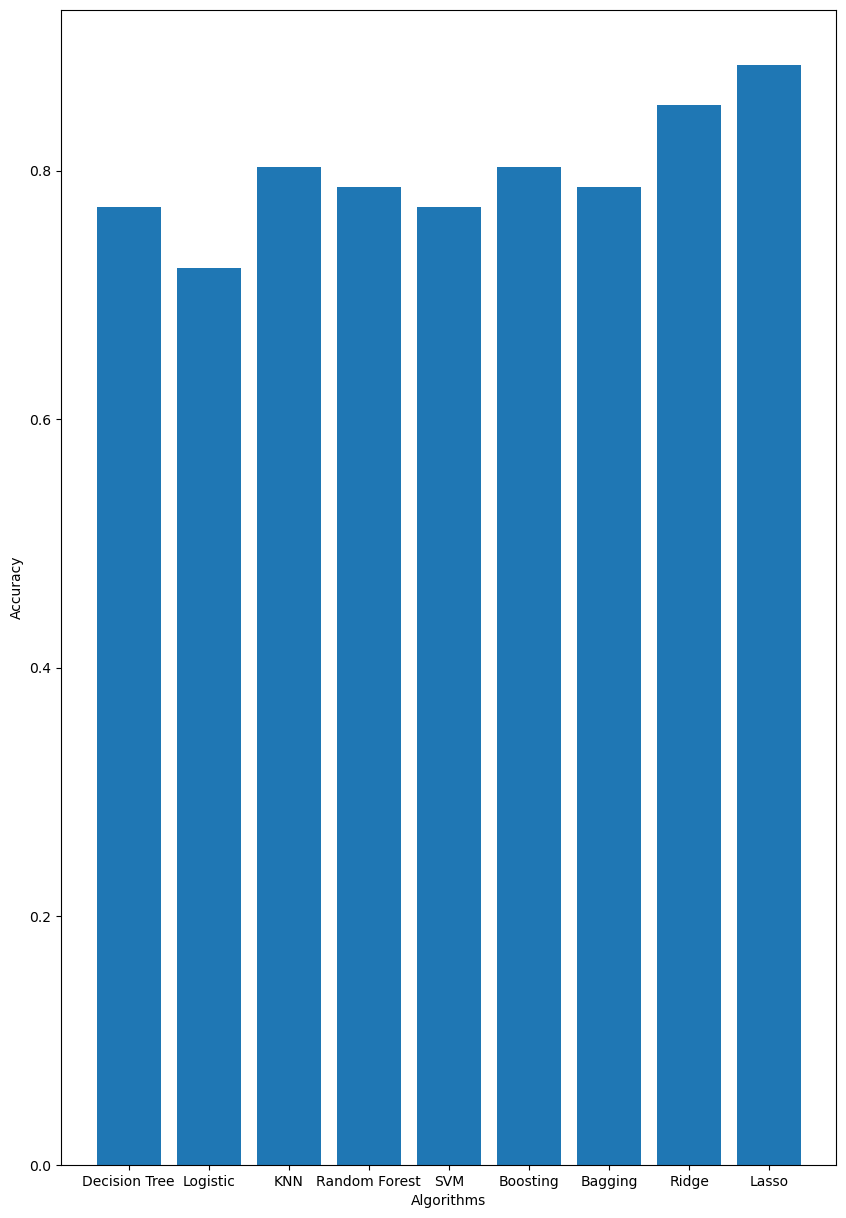

In [874]:
plt.figure(figsize=(10, 15))
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM','Boosting', 'Bagging', 'Ridge', 'Lasso'],[tree_ac,accuracy_logistic,ac_knn,ac_rf,svm_ac  , boost_accuracy,bagged_accuracy,accuracy_ridge, accuracy_lasso])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Selecting models using precision and recall score is suggested but will not be implemented in this code.